In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 10)


In [2]:
# Число дней для удвоения данных data за последние days дней
def calc_double(data, days = 10):
    dates = data.index[-days :]

    rate_all = pd.DataFrame(index = dates)

    for city in data.keys():   
        rate = [] #дней для удвоения
    
        #для каждой даты
        for cur_row in range(1, data.index.size, 1):
            half = int(data[city].values[cur_row] / 2)    
            if (half < 2): #при малом числе случаев, как-то бессмысленно оценивать скорость
                rate.append(-1)
                continue        
    
            #назад по списку, пока не найдём значение в два раза меньшее, чем на текущую дату
            for prev in range(cur_row - 1, -1, -1):        
                #print(prev, half, data['СПб'].values[row])               
                if half >= data[city].values[prev]:
                    diff = data[city].index[cur_row] - data[city].index[prev]
                    rate.append(diff.days)
                    break
                
        rate_all[city] = rate[-days : ]
    return rate_all

## Новых случаев

In [3]:
# Боткина в инфекционном - на стационаре с признаками ОРВИ на этот день
# Обследованы СПб - обследований на коронавирус
# Вызовы 112 - вызовы в связи с коронавирусом, перенаправленные в службу городской скорой медицинской помощи

new_case = pd.read_csv('data_new.csv', sep=';', parse_dates=['Дата'], index_col='Дата')
new_case.columns = new_case.columns.str.strip()
cities = ['СПб', 'Лен. обл.', 'Москва', 'Моск. обл']

In [4]:
new_case.keys()

Index(['СПб', 'Лен. обл.', 'Москва', 'Моск. обл', 'Боткина в инфекционном',
       'Обследованы СПб', 'Вызовы 112'],
      dtype='object')

In [5]:
#Последние 20 дней
new_case.last('20D')

,СПб,Лен. обл.,Москва,Моск. обл,Боткина в инфекционном,Обследованы СПб,Вызовы 112
Дата,,,,,,,
2020-04-07,69,0,697,67,NaN,6957.0,125.0
2020-04-08,34,32,660,95,NaN,3279.0,225.0
2020-04-09,44,18,857,199,NaN,8811.0,135.0
2020-04-10,35,17,1124,182,NaN,6736.0,71.0
2020-04-11,80,5,1030,152,NaN,7554.0,89.0
2020-04-12,69,5,1306,278,NaN,5589.0,117.0
2020-04-13,121,16,1355,495,NaN,1821.0,111.0
2020-04-14,121,35,1489,460,NaN,4703.0,44.0
2020-04-15,130,108,1774,272,NaN,3844.0,80.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f2758c320>,
      dtype=object)

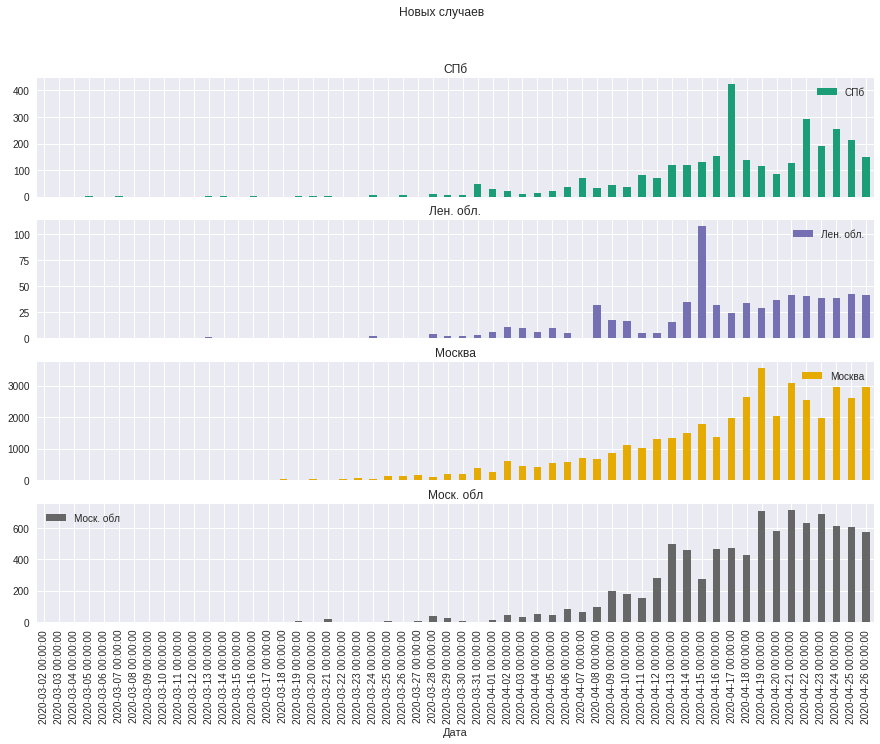

In [6]:
new_case[cities].plot.bar(subplots = True, title = "Новых случаев",  figsize=(15,10), colormap='Dark2')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f2541f080>,
      dtype=object)

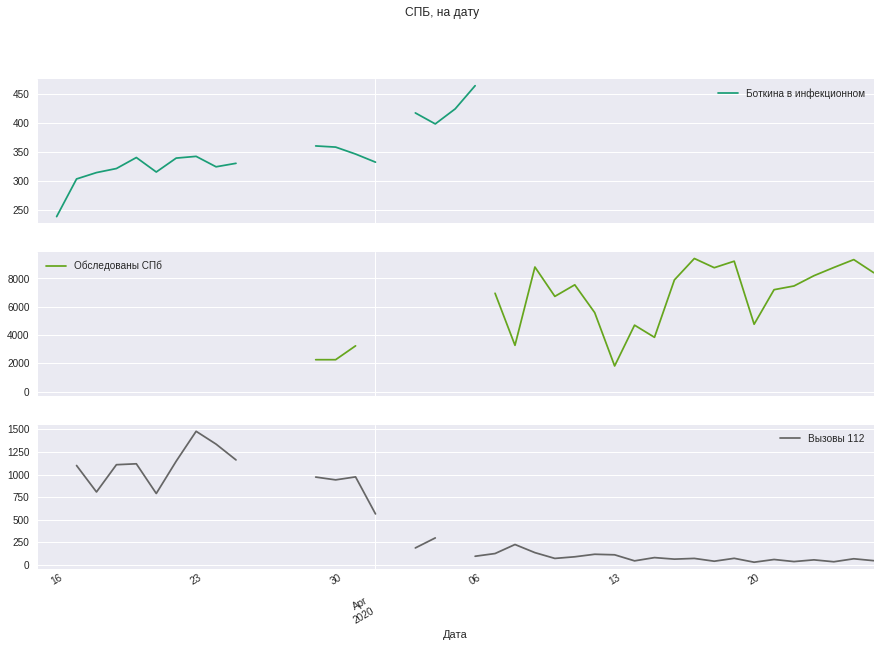

In [7]:
new_case[['Боткина в инфекционном','Обследованы СПб', 'Вызовы 112']][13:].plot(subplots = True, title = "СПБ, на дату",  figsize=(15,10), colormap='Dark2')

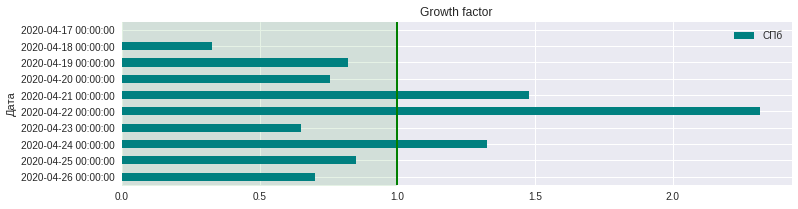

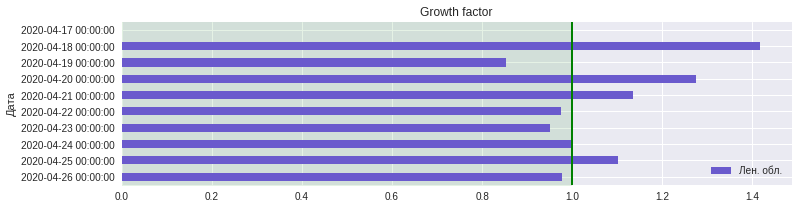

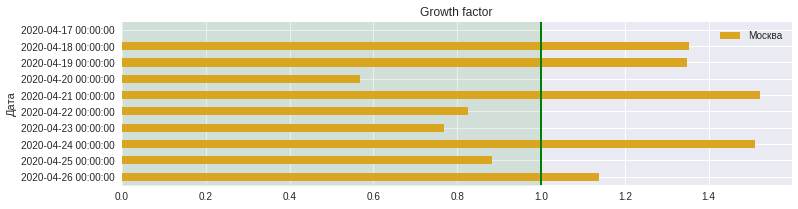

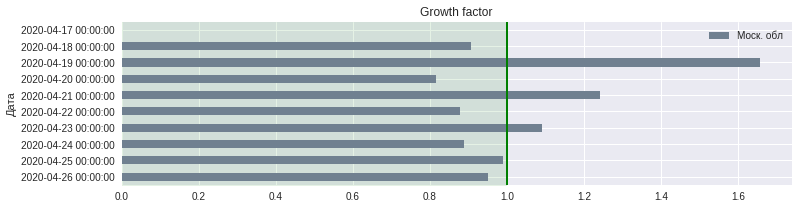

In [8]:
#Growth factor for last ten days

dates = new_case.index[-10 :]


gf_all = pd.DataFrame(index = dates)

for city in cities: #new_case.keys():   
    gf = []
    gf.append(None) # для первой даты

    #для каждой даты
    for row in range(new_case.index.size - 10 + 1, new_case.index.size, 1):
        if (0 == new_case[city].values[row - 1]):
            gf.append(None)
        else:
            gf.append(new_case[city].values[row] / new_case[city].values[row - 1])
    #print(new_case[city].values[row], new_case[city].values[row - 1], gf)
    gf_all[city] = gf
    
gf_all


colors = ['teal', 'slateblue', 'goldenrod', 'slategrey']
idx = 0
for city in cities: #new_case.keys(): 
    x = np.array([0, 1])
    gf_all[[city]].plot.barh(subplots = False, title = "Growth factor", figsize=(12,3), color = colors[idx]) 
    plt.axvline(x=1, lw=2, color='green')
    plt.fill_between(x, -1, dates.size + 1, color='green', alpha=0.1)
    plt.gca().invert_yaxis()
    idx += 1



## Всего случаев

In [9]:
total = new_case[cities].copy()
#print(total.index.size)
for row in range(1, total.index.size, 1):
    total[:].values[row] = total[:].values[row] + total[:].values[row-1]

total.to_csv("data_total.csv",  sep=';')


In [10]:
#total = pd.read_csv('data_total.csv', sep=';', parse_dates=['Дата'], index_col='Дата')
#total.columns = total.columns.str.strip()

#Последние 10 дней
total.last('20D')

,СПб,Лен. обл.,Москва,Моск. обл
Дата,,,,
2020-04-07,295,62,5182,453
2020-04-08,329,94,5842,548
2020-04-09,373,112,6699,747
2020-04-10,408,129,7823,929
2020-04-11,488,134,8853,1081
2020-04-12,557,139,10159,1359
2020-04-13,678,155,11514,1854
2020-04-14,799,190,13003,2314
2020-04-15,929,298,14777,2586


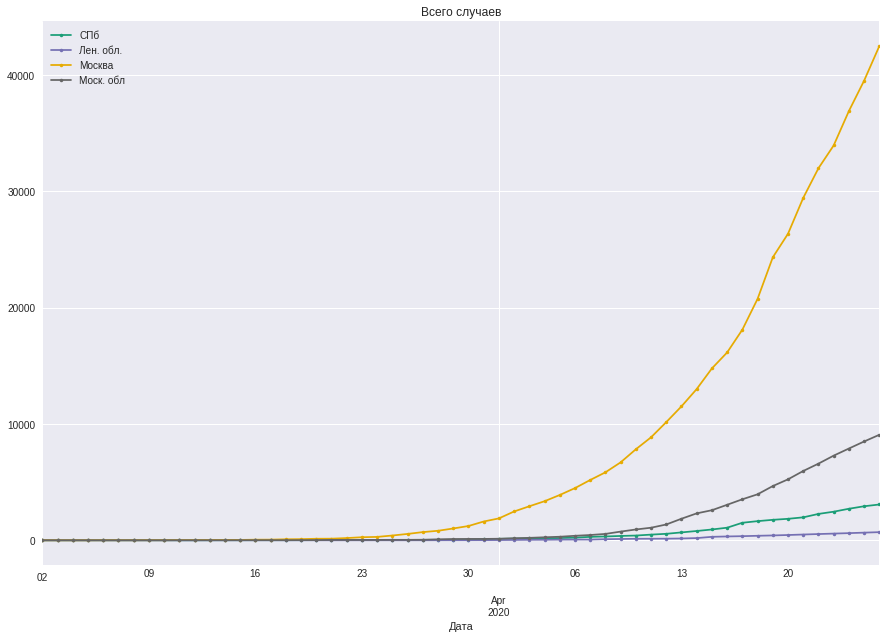

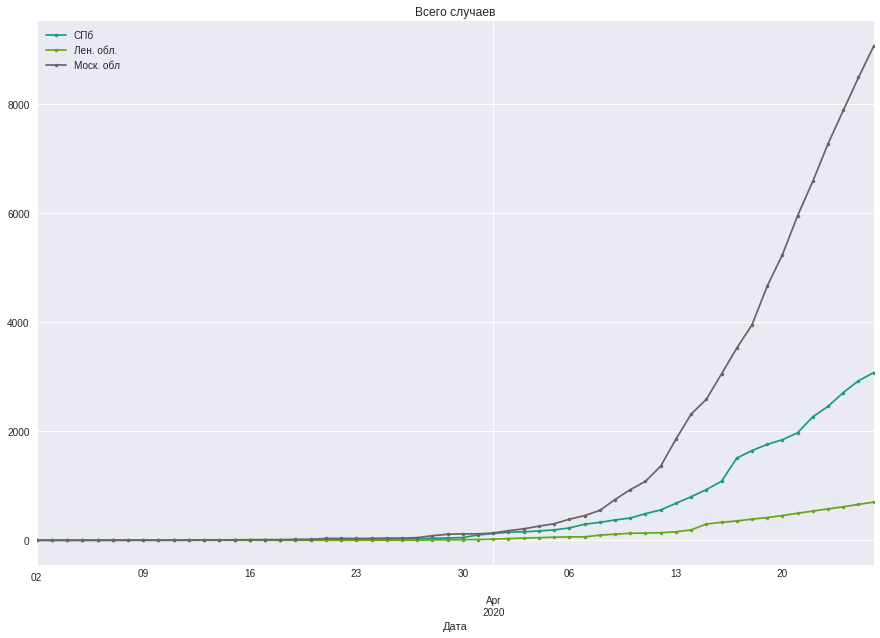

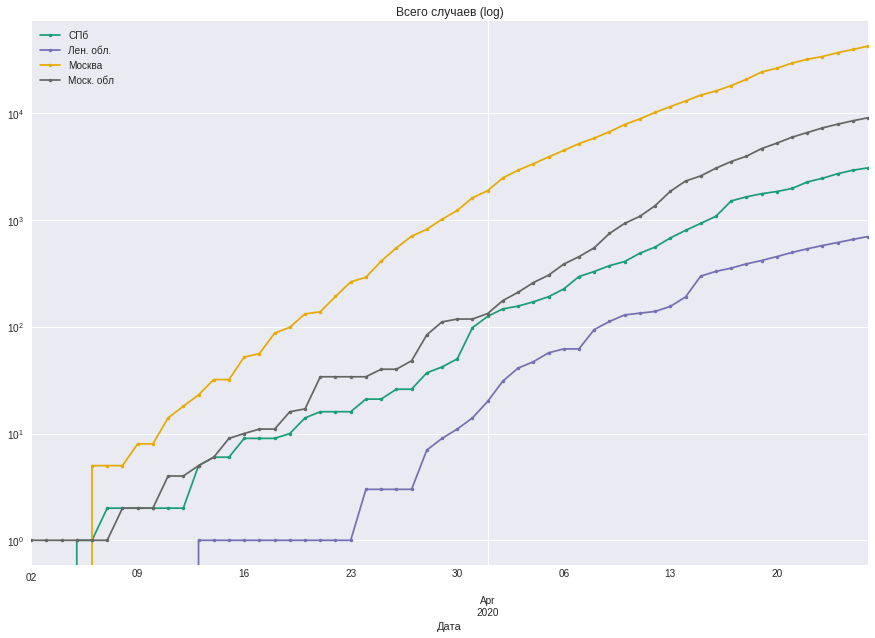

In [11]:
total.plot(style='.-', title = "Всего случаев", colormap='Dark2', figsize=(15,10))
total[['СПб', 'Лен. обл.', 'Моск. обл']].plot(style='.-', title = "Всего случаев", colormap='Dark2', figsize=(15,10))
total.plot(style='.-', title = "Всего случаев (log)", colormap='Dark2',  figsize=(15,10), logy = True)

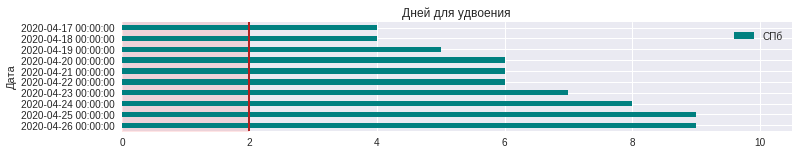

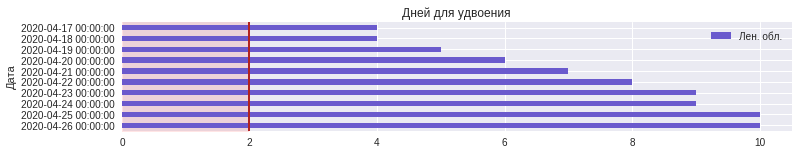

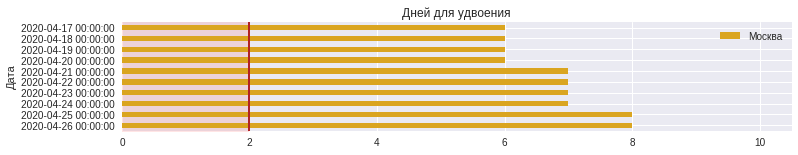

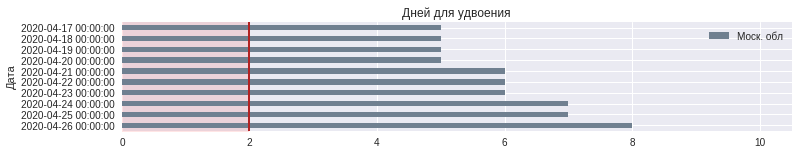

In [12]:
#Число дней, понадобившихся для удвоения (за последние 10 дней)
rate_all = calc_double(total)

colors = ['teal', 'slateblue', 'goldenrod', 'slategrey']
idx = 0
for city in total.keys(): 
    x = np.array([0, 1, 2])
    rate_all[[city]].plot.barh(subplots = False, title = "Дней для удвоения", figsize=(12,2), color = colors[idx], xlim = (0, rate_all.max().max() + 0.5)) 
    plt.fill_between(x, -1, dates.size + 1,  color='red', alpha=0.1)
    plt.axvline(x=2, lw=2, color='firebrick')
    plt.gca().invert_yaxis()
    idx += 1    


In [13]:
# -1 -> маленькое число случаев, расчёт не производился
rate_all

,СПб,Лен. обл.,Москва,Моск. обл
Дата,,,,
2020-04-17,4,4,6,5
2020-04-18,4,4,6,5
2020-04-19,5,5,6,5
2020-04-20,6,6,6,5
2020-04-21,6,7,7,6
2020-04-22,6,8,7,6
2020-04-23,7,9,7,6
2020-04-24,8,9,7,7
2020-04-25,9,10,8,7


## Летальные

In [34]:
death_case = pd.read_csv('death_new.csv', sep=';', parse_dates=['Дата'], index_col='Дата')
death_case.columns = death_case.columns.str.strip()

In [35]:
death_case.keys()

Index(['СПб', 'Лен. обл.', 'Москва', 'Моск. обл', 'Другие'], dtype='object')

In [36]:
death_case

,СПб,Лен. обл.,Москва,Моск. обл,Другие
Дата,,,,,
2020-03-25,0,0,2,0,0
2020-03-26,0,0,0,0,0
2020-03-27,0,0,1,0,0
2020-03-28,0,0,1,0,0
2020-03-29,1,0,2,0,1
2020-03-30,0,0,0,0,1
2020-03-31,1,0,5,0,2
2020-04-01,0,0,5,1,1
2020-04-02,0,0,3,1,2


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f21ad5358>,
      dtype=object)

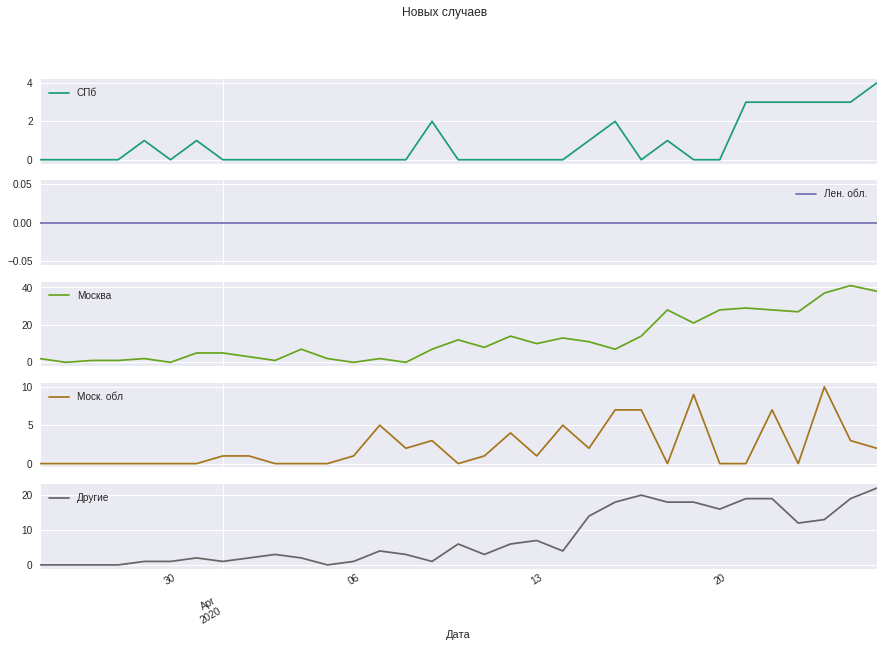

In [37]:
death_case.plot(subplots = True, title = "Новых случаев",  figsize=(15,10), colormap='Dark2')

In [38]:
death_total = death_case.copy()

for row in range(1, death_total.index.size, 1):
    death_total[:].values[row] = death_total[:].values[row] + death_total[:].values[row-1]

death_total.to_csv("death_total.csv",  sep=';')
death_total

,СПб,Лен. обл.,Москва,Моск. обл,Другие
Дата,,,,,
2020-03-25,0,0,2,0,0
2020-03-26,0,0,2,0,0
2020-03-27,0,0,3,0,0
2020-03-28,0,0,4,0,0
2020-03-29,1,0,6,0,1
2020-03-30,1,0,6,0,2
2020-03-31,2,0,11,0,4
2020-04-01,2,0,16,1,5
2020-04-02,2,0,19,2,7


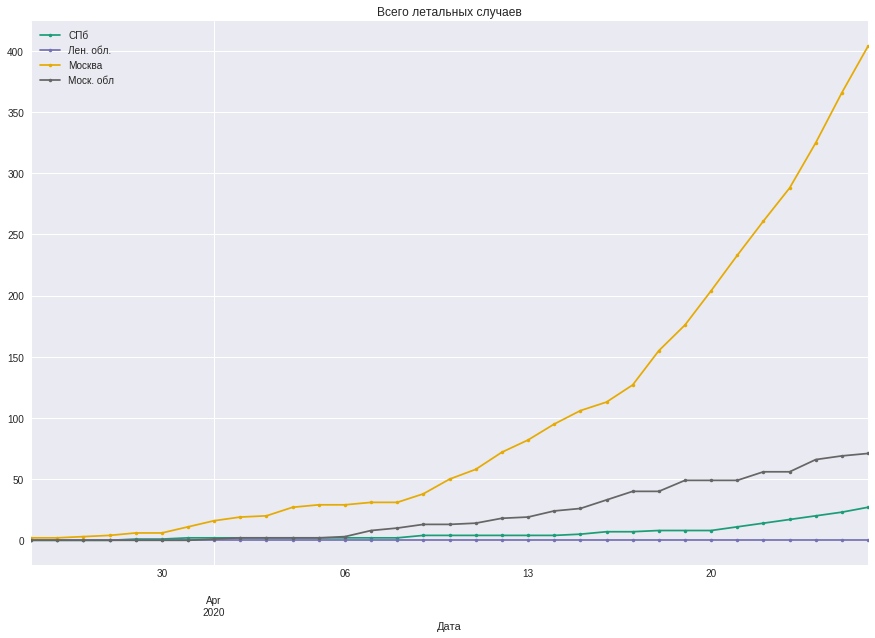

In [39]:
death_total[cities].plot(style='.-', title = "Всего летальных случаев", colormap='Dark2', figsize=(15,10))
#death_total[cities].plot(style='.-', title = "Всего случаев (log)", colormap='Dark2', logy = True)

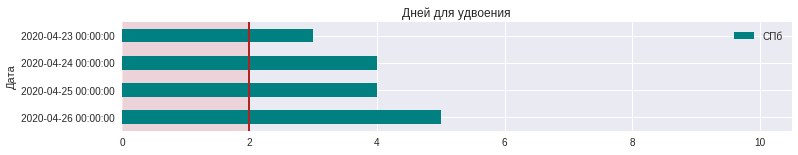

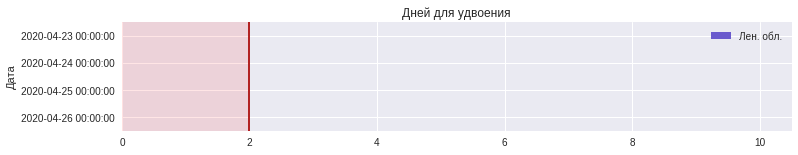

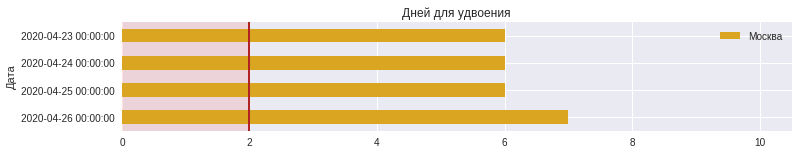

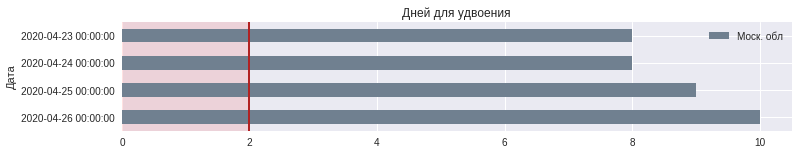

In [40]:
#Число дней, понадобившихся для удвоения (за последние 4 дня)
rate_death = calc_double(death_total[cities], 4)

colors = ['teal', 'slateblue', 'goldenrod', 'slategrey']
idx = 0
for city in cities: 
    x = np.array([0, 1, 2])
    rate_death[[city]].plot.barh(subplots = False, title = "Дней для удвоения", figsize=(12,2), color = colors[idx], xlim = (0, rate_all.max().max() + 0.5)) 
    plt.fill_between(x, -1, dates.size + 1,  color='red', alpha=0.1)
    plt.axvline(x=2, lw=2, color='firebrick')
    plt.gca().invert_yaxis()
    idx += 1    

## Страна

In [41]:
country = pd.read_csv('data_country.csv', sep=';', parse_dates=['Дата'], index_col='Дата')
country.columns = country.columns.str.strip()

In [42]:
#Всего на дату
offset = 23 #до даты появления летальных случаев
death_all = pd.DataFrame(index = country.index[offset:])
death_all['Умерших'] = 0
death_all['Умерших'].values[0] = country[['Умерших']].values[offset]

#print(total.index.size)
for row in range(1, death_all.index.size, 1):
    death_all['Умерших'].values[row] = country[['Умерших']].values[row+offset] + death_all[['Умерших']].values[row-1]

country['Всего умерших'] =  death_all

In [43]:
print(country.keys())

#Последние 10 дней
country.last('10D')

Index(['Зарегистрированных', 'Выписанных', 'Умерших', 'Под контролем',
       'Всего зарег.', 'Всего умерших'],
      dtype='object')


,Зарегистрированных,Выписанных,Умерших,Под контролем,Всего зарег.,Всего умерших
Дата,,,,,,
2020-04-17,4070,2590,41,129175.0,32008,273.0
2020-04-18,4785,3057,40,132200.0,36793,313.0
2020-04-19,6060,3291,48,132328.0,42853,361.0
2020-04-20,4268,3446,44,135198.0,47121,405.0
2020-04-21,5642,3873,51,139505.0,52763,456.0
2020-04-22,5236,4420,57,145797.0,57999,513.0
2020-04-23,4774,4891,42,151737.0,62773,555.0
2020-04-24,5849,5568,60,161657.0,68622,615.0
2020-04-25,5966,6250,66,168055.0,74588,681.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8f21721a20>,
      dtype=object)

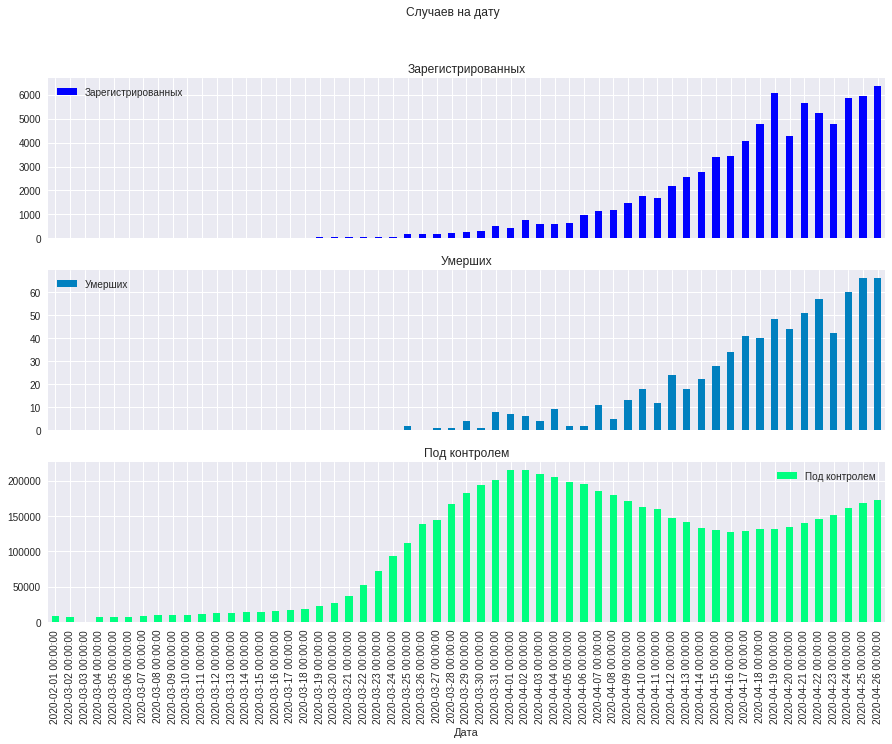

In [44]:
country[['Зарегистрированных',  'Умерших', 'Под контролем']].plot.bar(subplots = True, title = "Случаев на дату", colormap='winter', figsize=(15,10))

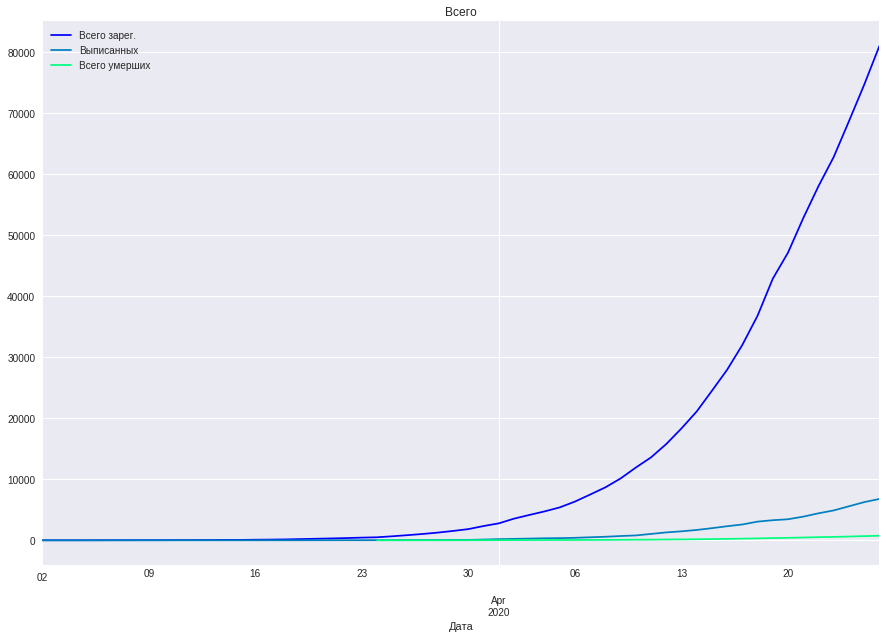

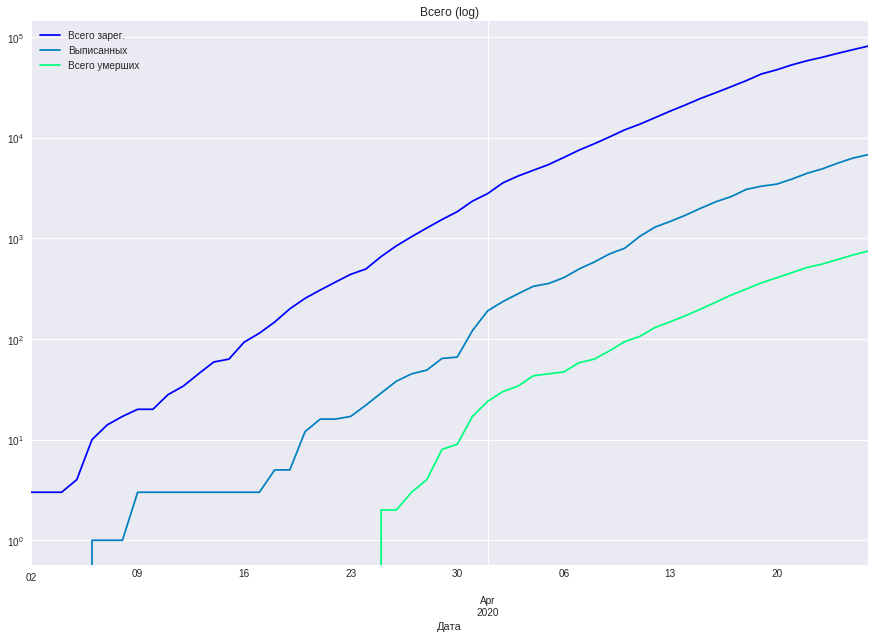

In [45]:
#начиная с 02.03.20
country[['Всего зарег.', 'Выписанных', 'Всего умерших']][1:].plot(subplots = False, title = "Всего", colormap='winter', figsize=(15,10))
country[['Всего зарег.', 'Выписанных', 'Всего умерших']][1:].plot(subplots = False, title = "Всего (log)", colormap='winter', logy=True, figsize=(15,10))

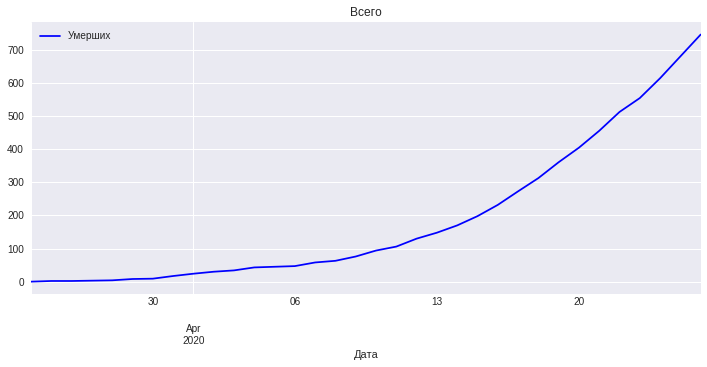

In [46]:
death_all.plot(subplots = False, title = "Всего", colormap='winter', figsize=(12,5))